<img src="wine.jpg">

### Project: Investigate a Dataset (winequality-red ,winequality-white)
#### Table of Contents:
1. [Introduction](#Introduction:)
2. [Data Wrangling](#Data-Wrangling)
3. [Exploratory Data Analysis](#EDA-with-Visuals)
4. [Conclusions](#Conclusions:)
5. [Limitations:](#Limitations:)
6. [Question 1](#Question-1)
7. [Question 2](#Question-2)
8. [Question 3](#Question-3)
9. [Question 4](#Question-4)
    

# Introduction:
In this Case, I will tackle a real-world data set [DataSet](https://archive.ics.uci.edu/ml/datasets/Wine+Quality),using python libraries (Pandas, NumPy, Matplotlib) 
to analyze a data set of the chemical properties of wine and their associated quality ratings.
### Question that can answered from this data set:
1. Is a certain type of wine (red or white) associated with higher quality?
2. What level of acidity (pH value) receives the highest average rating?
3. Do wines with higher alcoholic content receive better ratings?
4. Do sweeter wines (more residual sugar) receive better ratings?

# Data Wrangling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
w_df=pd.read_csv('winequality-white.csv',sep=';')
r_df=pd.read_csv('winequality-red.csv',sep=';')

In [3]:
w_df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
r_df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Assessing_Data

In [5]:
#white_wine
num_rows, num_cols = w_df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 4898
Number of columns: 12


In [6]:
missing_value=w_df.isnull().sum()
missing_value

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
print("Features with missing values:")
print(missing_value[missing_value > 0])

Features with missing values:
Series([], dtype: int64)


In [8]:
duplicate_rows=w_df.duplicated().sum()
duplicate_rows

937

In [9]:
unique_values = w_df['quality'].nunique()
unique_values

7

In [10]:
#Red_wine
num_rows, num_cols = r_df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 1599
Number of columns: 12


In [11]:
missing_value=r_df.isnull().sum()
missing_value

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [12]:
print("Features with missing values:")
print(missing_value[missing_value > 0])

Features with missing values:
Series([], dtype: int64)


In [13]:
duplicate_rows=r_df.duplicated().sum()
duplicate_rows

240

In [14]:
unique_values = r_df['quality'].nunique()
unique_values

6

In [15]:
r_df['density'].mean()

0.9967466791744831

# Appending Data

In [16]:
r_df['color']='red'

In [17]:
r_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [18]:
w_df['color']='white'

In [19]:
w_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [20]:
wine_df = r_df.append(w_df)

C:\Users\Khallaf\AppData\Local\Temp\ipykernel_19464\1105191987.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wine_df = r_df.append(w_df)


In [21]:
wine_df = pd.concat([r_df, w_df], ignore_index=True)

In [22]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [23]:
wine_df.shape

(6497, 13)

In [24]:
wine_df.to_csv('winequality_edited.csv', index=False)

# EDA with Visuals

In [25]:
df = pd.read_csv("winequality_edited.csv")

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


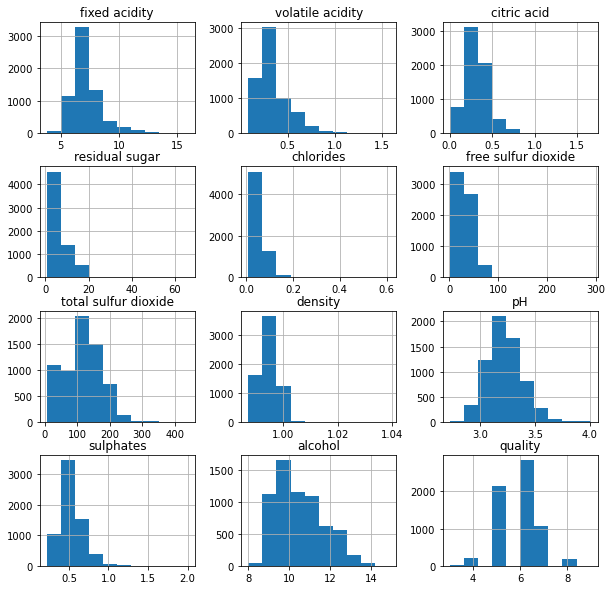

In [26]:
df.hist(figsize=(10,10));

# Scatterplots of Quality Against Various Features

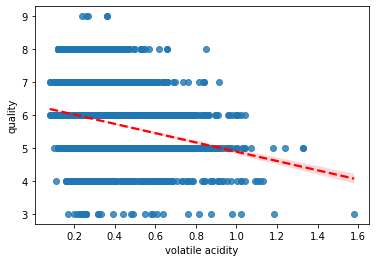

In [27]:
sns.regplot(x="volatile acidity", y="quality", data=df,line_kws={'linestyle':'--',"color": "red"});

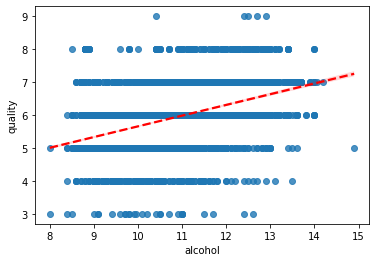

In [28]:
sns.regplot(x="alcohol", y="quality", data=df,line_kws={'linestyle':'--',"color": "red"});

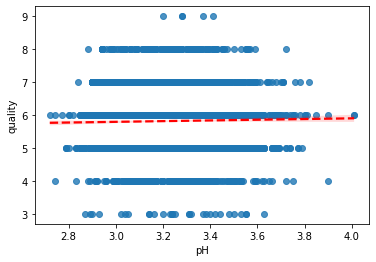

In [29]:
sns.regplot(x="pH", y="quality", data=df,line_kws={'linestyle':'--',"color": "red"});

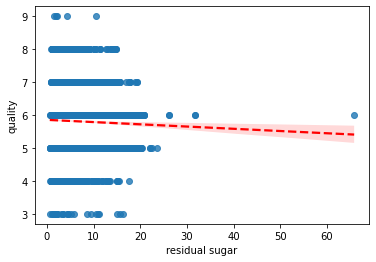

In [30]:
sns.regplot(x="residual sugar", y="quality", data=df,line_kws={'linestyle':'--',"color": "red"});

# Q1: Is a certain type of wine (red or white) associated with higher quality?

In [31]:
df.groupby(['color'], as_index=False)['quality'].mean()

,color,quality
0,red,5.636023
1,white,5.877909


Text(0, 0.5, 'Count')

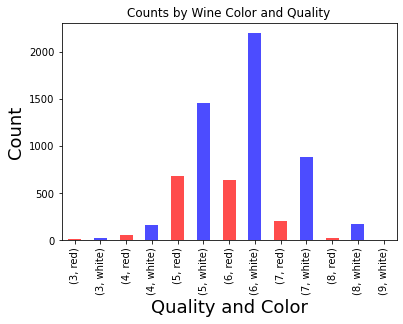

In [32]:
color_counts = df.groupby(['quality', 'color']).count()['pH']
colors = ['red', 'blue']
color_counts.plot(kind='bar', title='Counts by Wine Color and Quality', color=colors, alpha=.7);
plt.xlabel('Quality and Color', fontsize=18)
plt.ylabel('Count', fontsize=18)

Text(0, 0.5, 'Proportion')

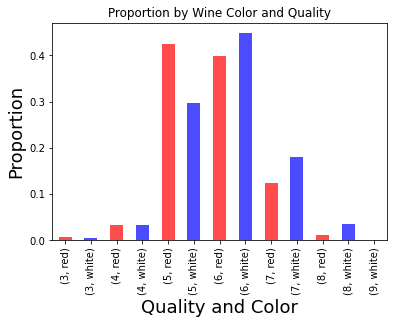

In [33]:
color_totals = df.groupby('color').count()['pH']
proportions = color_counts / color_totals
proportions.plot(kind='bar', title='Proportion by Wine Color and Quality', color=colors, alpha=.7);
plt.xlabel('Quality and Color', fontsize=18)
plt.ylabel('Proportion', fontsize=18)

# Q2: What level of acidity (pH value) receives the highest average rating?

In [34]:
df["pH"].describe()

count    6497.000000
mean        3.218501
std         0.160787
min         2.720000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: pH, dtype: float64

In [35]:
bin_edges = [2.72, 3.11, 3.21, 3.32, 4.01]

In [36]:
bin_names = ['high', 'mod_high', 'medium', 'low']

In [37]:
'''
pd.cut():function is used to group the pH values into categories based on the provided bin edges and labels.

-->pd.cut() function takes three arguments:
1-df['pH']  : specifies the column of pH values to be categorized.
2-bin_edges : is a list of values that define the bin edges used to group the pH values.
3-labels    : is a list of category labels to assign to each group of pH values based on the provided bin edges.
'''
df['acidity_levels'] = pd.cut(df['pH'], bin_edges, labels=bin_names)

In [38]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,mod_high
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,mod_high
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


In [39]:
acidity_level_quality_means = df.groupby('acidity_levels').quality.mean()
acidity_level_quality_means

acidity_levels
high        5.783343
mod_high    5.784540
medium      5.850832
low         5.859593
Name: quality, dtype: float64

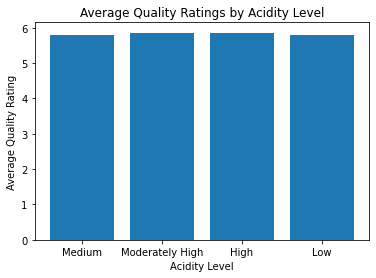

In [40]:
locations = [4, 1, 2, 3]  # reorder values above to go from low to high
heights = acidity_level_quality_means

labels = ['Low', 'Medium', 'Moderately High', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Acidity Level')
plt.xlabel('Acidity Level')
plt.ylabel('Average Quality Rating');

In [41]:
# Save changes 
df.to_csv('winequality_edited.csv', index=False)

# Q3: Do wines with higher alcoholic content receive better ratings?

In [42]:
df["alcohol"].median()

10.3

In [43]:
low_alcohol =df.query('alcohol < 10.3')
high_alcohol =df.query('alcohol >= 10.3')

In [44]:
# ensure these queries included each sample exactly once
num_samples = df.shape[0]
num_samples == low_alcohol['quality'].count() + high_alcohol['quality'].count() # should be True

True

In [45]:
mean_quality_low=low_alcohol.quality.mean()
mean_quality_high=high_alcohol.quality.mean()
mean_quality_low,mean_quality_high

(5.475920679886686, 6.146084337349397)

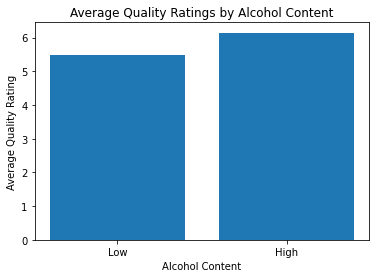

In [46]:
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Average Quality Rating');

# Q4: Do sweeter wines (more residual sugar) receive better ratings?

In [47]:
df["residual sugar"].median()

3.0

In [48]:
low_sugar =df.query('`residual sugar` < 3')
high_sugar =df.query('`residual sugar` >= 3')

In [49]:
mean_quality_low=low_sugar.quality.mean()
mean_quality_high=high_sugar.quality.mean()
mean_quality_low,mean_quality_high

(5.808800743724822, 5.82782874617737)

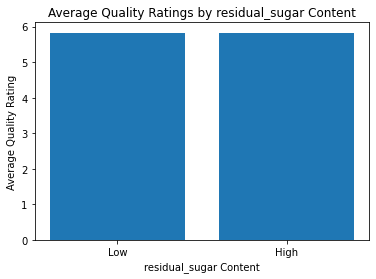

In [50]:
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by residual_sugar Content')
plt.xlabel('residual_sugar Content')
plt.ylabel('Average Quality Rating');

## Conclusions:
__Tip__: Through our operations(Data Wrangling,EDA), we were able to answer the questions we posed and represent them graphically,I came out with some very interesting facts. After this analysis we can conclude following:

Using this data, we were able to find out which features can effect on quality of wine, and thus know the how to increase the quality Through this, we can conclude that if you want the increase the quality , it must be more sweeter with low level of acidity with  higher alcoholic content

### Question 1
we asked about: Is a certain type of wine (red or white) associated with higher quality?For this question, compare the average quality of red wine with the average quality of white wine with (groupby) we find that the mean quality of red wine  less than that of white wine means that quality of white wine greater than quality od red wine

### Question 2
we asked about : What level of acidity (pH value) receives the highest average rating?For this question,after splitting pH value into categories , we find that level of acidity Which receives the highest mean quality rating is Low(5.859593)

### Question 3
we asked about : Do wines with higher alcoholic content receive better ratings? after some operation on data we find that higher alcoholic content receive better ratings(6.1617738913179263)
and lower alcoholic content receive low ratings(5.47592067989)
### Question 4
we asked about : Do sweeter wines (more residual sugar) receive better ratings? after some operation on data we find that sweeter wines receive higher ratings(5.82) 
low_sugar quality receive lower ratings(5.80)

## Limitations:
question(2) is more tricky because unlike color, which has clear categories can group by (red and white) , pH is a quantitative variable without clear categories and the data made available by the source is limited. so i create a categorical variable from a quantitative variable by creating categories ('high', 'mod_high', 'medium', 'low').
Acidity Levels:
1. High: Lowest 25% of pH values( from 2.72 to 3.11)
2. Moderately High: 25% - 50% of pH values(from 3.11 to 3.21)
3. Medium: 50% - 75% of pH values(from 3.21 to 3.32)
4. Low: 75% - max pH value(from 3.32 to 4.01)
-the data is being split at the 25th, 50th, and 75th percentile,getting these numbers with pandas' describe(), After creating these four categories,I able to use groupby to get the mean quality rating for each acidity level.